# Final Presentation Notebook
##### Alexa, play Despacito

## Introduction
- Welcome to our final presentation! 
- For our presentaation, we individuaally determined a "best" neighborhood according to some metric, and then combined our rankings to give you a definitive answer to the question: "Which Pittsburgh Neighborhood is the Best?"
- We picked our inividual metrics because we all agreed that safety, infrastructure, and cleanliness are important to fostering a healthy community in any neighborhood

## Metrics
- Krishna:
    - Ranked neighborhoods based on the proportion of crimes in a given neighborhood relative to the neighborhood's population.

- Cavan:
    - Ranked neighborhoods based on the number of Pittsburgh's new "Smart Trash Cans" in the neighborhood. 

- Sam:
    - Ranked neighborhoods based on the number of public wifi networks in the neighborhood.


## The Best Neighborhood - Analysis
- We made a file that contains our individual top 10 neighborhoods, and then determined the best neighborhood using golf-style scoring. We added the placement number of each neighborhood together, and whichever one had the lowest overall number placed the highest, making it the best neighborhood!

,neighborhood,score
13,Squirrel Hill South,38
5,Brookline,43
3,Bluff,46
15,Squirrel Hill North,47
10,Point Breeze,65


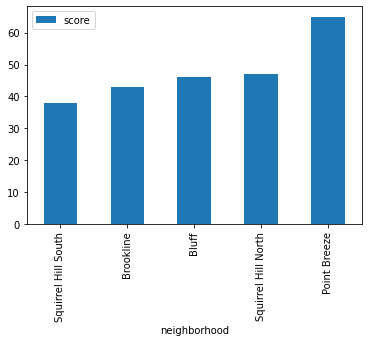

In [45]:
import pandas as pd

data = pd.read_csv("final_rankings.csv")
ranking_df = pd.DataFrame(data)

arrests = set(ranking_df['Arrests'])
hotspots = set(ranking_df['Wifi Hotspots'])
trashcans = set(ranking_df['Trash Cans'])

common_neighborhoods = list(arrests & hotspots & trashcans)
neighborhood_scores = list(range(len(common_neighborhoods)))

for i in range(len(common_neighborhoods)):
    curr_neighborhood = common_neighborhoods[i]
    
    neighborhood_scores[i] += ranking_df['Arrests'].index[ranking_df['Arrests'] == curr_neighborhood].tolist()[0]
    neighborhood_scores[i] += ranking_df['Wifi Hotspots'].index[ranking_df['Wifi Hotspots'] == curr_neighborhood].tolist()[0]
    neighborhood_scores[i] += ranking_df['Trash Cans'].index[ranking_df['Trash Cans'] == curr_neighborhood].tolist()[0]

    
scores_df = pd.DataFrame(list(zip(common_neighborhoods, neighborhood_scores)), columns=['neighborhood', 'score'])
scores_df = scores_df.sort_values(by='score', ascending=True)
scores_df = scores_df.head(5)
scores_df.plot(kind='bar', x='neighborhood', y='score')
scores_df

## Conclusion
- According to our analysis, the best neighborhood in Pittsburgh as measured by wifi hotspot availability, arrest frequency, and trash can maintenance, is...

<details>
  <summary>DRUMROLL PLEASE...</summary>
  <h1 style="color:green">SQUIRREL HILL SOUTH!!!</h1>
  <h4>Followed by:</h4>
    <ol start="2">
      <li>Brookline</li>
      <li>Bluff</li>
      <li>Squirrel Hill North</li>
      <li>Point Breeze</li>
    </ol>
</details>